In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

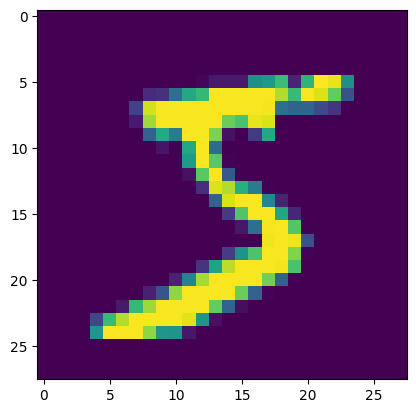

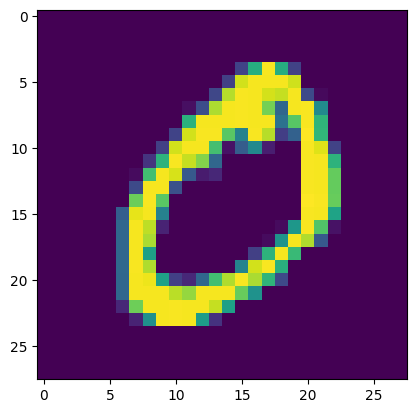

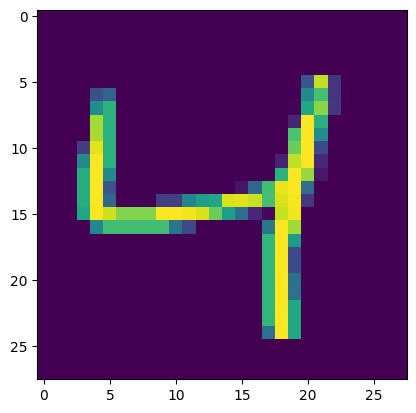

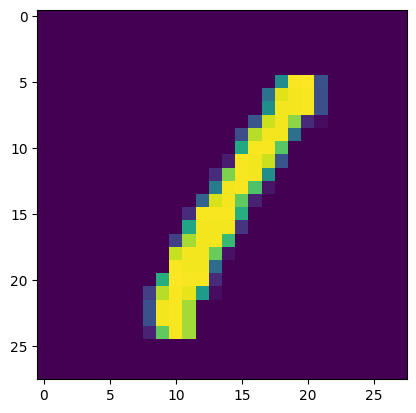

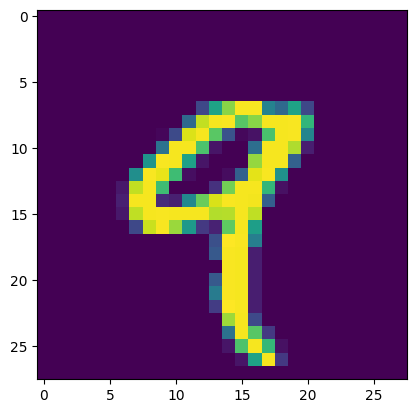

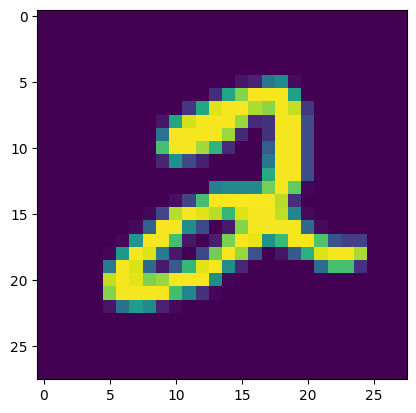

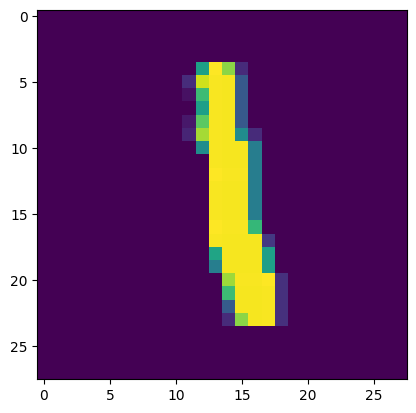

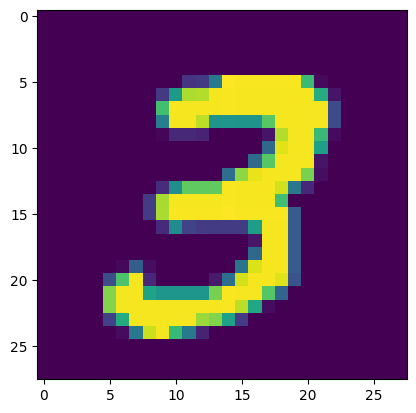

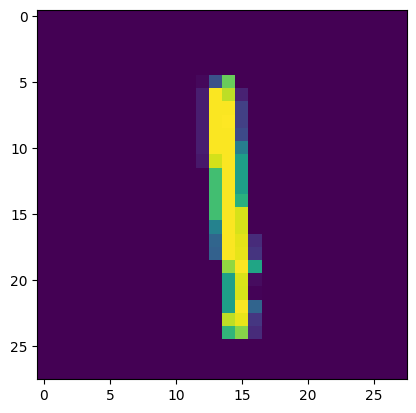

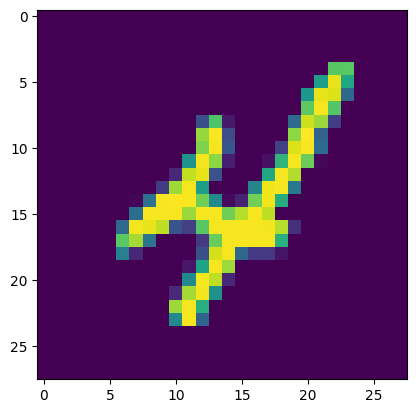

In [5]:
for i in range(10):
  plt.imshow(x_train[i].reshape(28, 28))
  plt.show()

Caption: A set of 10 example images from the MNIST dataset. This data set contains single channel images of the 10 arabic numerals.

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [22]:
# I only used a couple layers because I was interesed to see how it would perform
cnn = keras.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [23]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = cnn.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7411 - loss: 0.8096 - val_accuracy: 0.9326 - val_loss: 0.2326
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9437 - loss: 0.1927 - val_accuracy: 0.9558 - val_loss: 0.1509
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9630 - loss: 0.1255 - val_accuracy: 0.9650 - val_loss: 0.1199
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9753 - loss: 0.0865 - val_accuracy: 0.9687 - val_loss: 0.1059
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9804 - loss: 0.0688 - val_accuracy: 0.9731 - val_loss: 0.0938
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9839 - loss: 0.0560 - val_accuracy: 0.9733 - val_loss: 0.0895
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9869 - loss: 0.0463 - val_accuracy: 0.9741 - val_loss: 0.0865
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9890 - loss: 0.0375 - val_accuracy: 0.

In [25]:
history.history

{'accuracy': [0.8611111044883728,
  0.9472222328186035,
  0.9661111235618591,
  0.9740889072418213,
  0.9792444705963135,
  0.9831777811050415,
  0.9857555627822876,
  0.9879555702209473,
  0.9912444353103638,
  0.9923999905586243],
 'loss': [0.4627586007118225,
  0.17909827828407288,
  0.1171359270811081,
  0.08897619694471359,
  0.07068395614624023,
  0.057509563863277435,
  0.0481315441429615,
  0.040523238480091095,
  0.03254479542374611,
  0.028065375983715057],
 'val_accuracy': [0.9326000213623047,
  0.9557999968528748,
  0.9649999737739563,
  0.9687333106994629,
  0.9731333255767822,
  0.9733333587646484,
  0.974133312702179,
  0.9747333526611328,
  0.9728666543960571,
  0.9758666753768921],
 'val_loss': [0.23261769115924835,
  0.15093885362148285,
  0.11993240565061569,
  0.1059308648109436,
  0.09378662705421448,
  0.08947881311178207,
  0.08651641756296158,
  0.08521633595228195,
  0.09713497757911682,
  0.08688648045063019]}

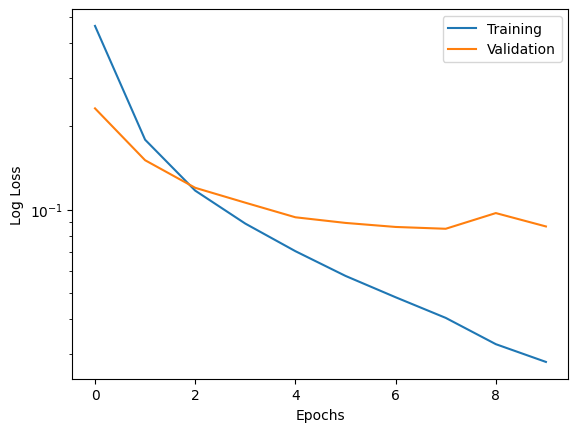

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.legend(['Training', 'Validation'])
plt.show()

Caption: A logy plot of a Convolutional Neural Network's (CNN) loss function over 10 epochs of training on the MNIST dataset. The CNN used categorical crossentropy for a loss function, and used a 4 layers: an implicit input layer, a single convolutional layer with a 3x3 kernel and 64 neurons, a single dense layer of 64 neurons, and a final dense output layer of 10 neurons. This configuration was chosen to make a minimal model while still providing near 98% correct identification. The loss function for the training data follows a negative power law after about 4 epochs while the validation data's loss function levels off after 6 epochs. Interestingly, the model seems to begin overfitting around the third to fourth epoch. The training data continues to improve while the test data plateaus. I believe this is because the model is so small, that it can no longer improve via genuine image recognition, but rather can only reduce the loss function by overfitting.

In [27]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9755 - loss: 0.0832


[0.07141625881195068, 0.979200005531311]